<a href="https://colab.research.google.com/github/rpujala/machine_learning/blob/main/Code_here_Demand_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)

n_skus=50
n_samples = 5000

data = {
    'sku_id': np.random.choice([f"sku_{i}" for i in range(n_skus)], n_samples),
    'week_of_year': np.random.randint(1, 53, n_samples),
    'price': np.random.uniform(10, 100, n_samples),
    'promotion': np.random.choice([0, 1], n_samples, p=[0.7, 0.3]),
    'holiday': np.random.choice([0, 1], n_samples, p=[0.85, 0.15]),
    'on_hand_inventory': np.random.randint(0, 500, n_samples),
    'lag_1_demand': np.random.randint(20, 200, n_samples),
    'lag_2_demand': np.random.randint(20, 200, n_samples),
    'lag_3_demand': np.random.randint(20, 200, n_samples)
}

df = pd.DataFrame(data=data)
df.head()

,sku_id,week_of_year,price,promotion,holiday,on_hand_inventory,lag_1_demand,lag_2_demand,lag_3_demand
0,sku_38,45,53.546497,0,0,326,118,24,118
1,sku_28,17,75.558024,0,0,73,114,172,117
2,sku_14,40,38.480912,0,0,250,119,53,45
3,sku_42,21,40.796777,1,0,449,110,159,122
4,sku_7,2,27.501717,1,0,393,63,47,116


In [ ]:
df['target'] = (
    0.5 * df['lag_1_demand'] +
    0.3 * df['lag_2_demand'] +
    0.2 * df['lag_3_demand'] +
    20 * df['promotion'] +
    30 * df['holiday'] -
    0.2 * df['price']
) + np.random.normal(0, 10, n_samples).clip(0)

In [ ]:
df.head()

,sku_id,week_of_year,price,promotion,holiday,on_hand_inventory,lag_1_demand,lag_2_demand,lag_3_demand,target
0,sku_38,45,53.546497,0,0,326,118,24,118,79.090701
1,sku_28,17,75.558024,0,0,73,114,172,117,116.888395
2,sku_14,40,38.480912,0,0,250,119,53,45,82.934941
3,sku_42,21,40.796777,1,0,449,110,159,122,147.476431
4,sku_7,2,27.501717,1,0,393,63,47,116,83.299657


In [ ]:
import numpy as np

df.replace('', np.nan, inplace=True)
df.isna().sum()

sku_id               0
week_of_year         0
price                0
promotion            0
holiday              0
on_hand_inventory    0
lag_1_demand         0
lag_2_demand         0
lag_3_demand         0
target               0
dtype: int64

In [ ]:
X = df.drop(columns=['target', 'sku_id'], axis=1)
y = df['target']

In [ ]:
X[:2]

,week_of_year,price,promotion,holiday,on_hand_inventory,lag_1_demand,lag_2_demand,lag_3_demand
0,45,53.546497,0,0,326,118,24,118
1,17,75.558024,0,0,73,114,172,117


In [ ]:
y[:2]

0     79.090701
1    116.888395
Name: target, dtype: float64

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

num_features = [
    'week_of_year',
    'price',
    'on_hand_inventory',
    'lag_1_demand',
    'lag_2_demand',
    'lag_3_demand'
]

cat_features = [
    'promotion',
    'holiday'
]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

In [ ]:
X_train.shape, y_train.shape

((4000, 8), (4000,))

In [ ]:
X_test.shape, y_test.shape

((1000, 8), (1000,))

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
type(X_train_processed)

numpy.ndarray

In [ ]:
type(X_test_processed)

numpy.ndarray

In [ ]:
# X_train_processed = X_train_processed.toarray()
# X_test_processed = X_test_processed.toarray()

In [ ]:
X_train_processed[0]

array([ 1.6398678 ,  0.30743876, -1.29029765,  1.68819235, -0.22073287,
       -1.31680915,  0.        ,  1.        ,  1.        ,  0.        ])

In [ ]:
y_train[:5]

4227    158.158989
4676     86.115449
800     172.814760
3671     73.099643
4193    138.101969
Name: target, dtype: float64

In [ ]:
X_train_processed.shape

(4000, 10)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
type(X_test), type(y_test)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
X_train_processed.shape

(4000, 10)

In [ ]:
X_test_processed.shape

(1000, 10)

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_processed.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)

model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=['mae']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                704       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import os
from datetime import datetime

# # 1. Clear any old model clutter from memory
# tf.keras.backend.clear_session()


log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="mymodel{epoch:02d}.keras",
        save_best_only=True,
        monitor='val_loss',
        verbose=2
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta = 0.01,
        patience=5,
        verbose=2
    ),
    tf.keras.callbacks.TensorBoard(
        log_dir=log_dir,
        histogram_freq=1
    )
]

model.fit(
    X_train_processed,
    y_train,
    epochs=20,
    batch_size=32,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=2
)

Epoch 1/20

Epoch 1: val_loss improved from inf to 68.78677, saving model to mymodel01.keras
100/100 - 1s - loss: 2485.8096 - mae: 30.2129 - val_loss: 68.7868 - val_mae: 6.3274 - 1s/epoch - 13ms/step
Epoch 2/20

Epoch 2: val_loss improved from 68.78677 to 52.13169, saving model to mymodel02.keras
100/100 - 0s - loss: 56.7072 - mae: 5.7572 - val_loss: 52.1317 - val_mae: 5.7224 - 291ms/epoch - 3ms/step
Epoch 3/20

Epoch 3: val_loss improved from 52.13169 to 47.31440, saving model to mymodel03.keras
100/100 - 0s - loss: 45.4831 - mae: 5.1462 - val_loss: 47.3144 - val_mae: 5.0023 - 281ms/epoch - 3ms/step
Epoch 4/20

Epoch 4: val_loss improved from 47.31440 to 44.97227, saving model to mymodel04.keras
100/100 - 0s - loss: 40.5223 - mae: 4.8319 - val_loss: 44.9723 - val_mae: 5.5219 - 291ms/epoch - 3ms/step
Epoch 5/20

Epoch 5: val_loss improved from 44.97227 to 37.45880, saving model to mymodel05.keras
100/100 - 0s - loss: 39.1584 - mae: 4.7847 - val_loss: 37.4588 - val_mae: 4.9022 - 283ms/e

# Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

preds = model.predict(X_test_processed).flatten()
preds[:5]

32/32 [==============================] - 0s 1ms/step


array([144.55402 ,  86.67217 , 117.20442 ,  95.02102 ,  46.044178],
      dtype=float32)

In [ ]:
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 4.595709124701299
RMSE: 6.258838913644865


# Feature Importance

Neural networks don't give feature importance directly, but we use **Permutation Importance**

In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance

# create a wrapper class to bridge Keras and Scikit-learn

class KerasWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        super().__init__()

        self.model = model

# scikit-learn requires a fit method to exist,
# even if we don't use it here

    def fit(self, X, y):
        return self

# use your custom logic here to flatten the output

    def predict(self, X):
        return self.model.predict(X, verbose=0).flatten()

wrapped_model = KerasWrapper(model)

# Now run permutation importance using the Wrapped model

result = permutation_importance(
    estimator=wrapped_model,
    X=X_test_processed,
    y=y_test,
    n_repeats=5,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=1
)

print("Feature Importances computed successfully")
print(result.importances_mean)



Feature Importances computed successfully
[-1.46233956e-02  2.65844100e+00  2.82347070e-03  2.58335363e+01
  1.38884077e+01  8.08533644e+00  1.00692178e+01  1.88049132e+01
  6.70942134e+00  1.42052326e+01]


In [ ]:
X_test.columns

Index(['week_of_year', 'price', 'promotion', 'holiday', 'on_hand_inventory',
       'lag_1_demand', 'lag_2_demand', 'lag_3_demand'],
      dtype='object')

New feature names (10): ['num__week_of_year' 'num__price' 'num__on_hand_inventory'
 'num__lag_1_demand' 'num__lag_2_demand' 'num__lag_3_demand'
 'cat__promotion_0' 'cat__promotion_1' 'cat__holiday_0' 'cat__holiday_1']


<Axes: >

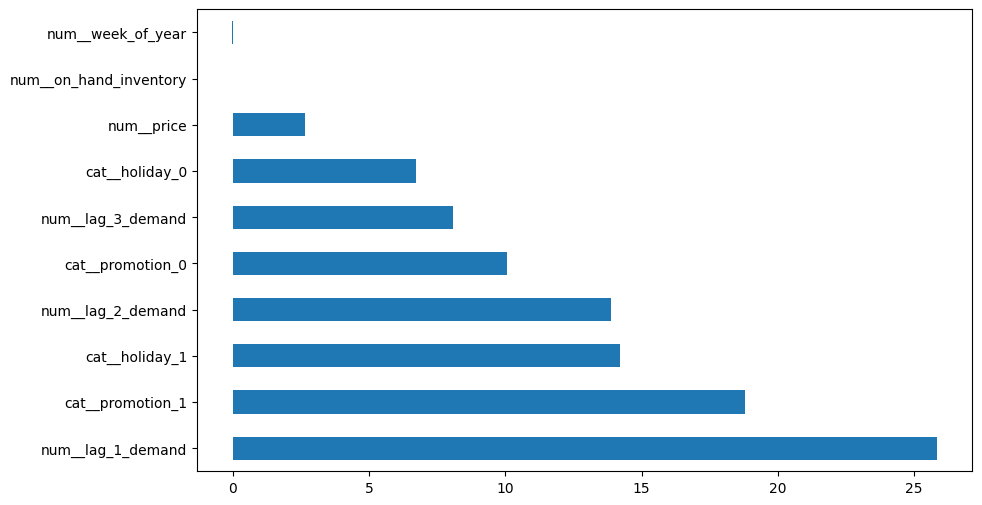

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Assuming your preprocessor is named 'preprocessor'
new_feature_names = preprocessor.get_feature_names_out()

print(f"New feature names ({len(new_feature_names)}): {new_feature_names}")

# Now plot with the correct names
importance_df = pd.Series(result.importances_mean, index=new_feature_names)
sorted_importance = importance_df.sort_values(ascending=False)
sorted_importance.plot(kind='barh', figsize=(10, 6))

In [ ]:
sorted_importance

num__lag_1_demand         25.833536
cat__promotion_1          18.804913
cat__holiday_1            14.205233
num__lag_2_demand         13.888408
cat__promotion_0          10.069218
num__lag_3_demand          8.085336
cat__holiday_0             6.709421
num__price                 2.658441
num__on_hand_inventory     0.002823
num__week_of_year         -0.014623
dtype: float64

**Note: Remove the useless num__on_hand_inventory and num__week_of_year columns and train the model again**

# Using datasets (optional)

In [ ]:
df.head()

,sku_id,week_of_year,price,promotion,holiday,on_hand_inventory,lag_1_demand,lag_2_demand,lag_3_demand,target
0,sku_38,45,53.546497,0,0,326,118,24,118,79.090701
1,sku_28,17,75.558024,0,0,73,114,172,117,116.888395
2,sku_14,40,38.480912,0,0,250,119,53,45,82.934941
3,sku_42,21,40.796777,1,0,449,110,159,122,147.476431
4,sku_7,2,27.501717,1,0,393,63,47,116,83.299657


In [ ]:
X = df.drop(columns=['sku_id', 'target'], axis=1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                 y_train,
                                                 test_size=0.2,
                                                 random_state=42)

In [ ]:
X_train.shape, y_train.shape

((3200, 8), (3200,))

In [ ]:
X_val.shape, y_val.shape

((800, 8), (800,))

In [ ]:
X_test.shape, y_test.shape

((1000, 8), (1000,))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

num_features = [
    'week_of_year',
    'price',
    'on_hand_inventory',
    'lag_1_demand',
    'lag_2_demand',
    'lag_3_demand'
]

cat_features = [
    'promotion',
    'holiday'
]

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train_processed, y_train))
train_ds = train_ds.shuffle(1000).batch(32)

val_ds = tf.data.Dataset.from_tensor_slices((X_val_processed, y_val))
val_ds = val_ds.shuffle(1000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((X_test_processed, y_test))

In [ ]:
X_train_processed.shape

(3200, 10)

In [ ]:
type(X_train_processed)

numpy.ndarray

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_processed.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True
)

model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=['mae']
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                704       
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import os
from datetime import datetime

# # 1. Clear any old model clutter from memory
# tf.keras.backend.clear_session()


log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="mymodel{epoch:02d}.keras",
        save_best_only=True,
        monitor='val_loss',
        verbose=2
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta = 0.01,
        patience=5,
        verbose=2
    ),
    tf.keras.callbacks.TensorBoard(
        log_dir=log_dir,
        histogram_freq=1
    )
]

model.fit(
    train_ds,
    epochs=20,
    batch_size=32,
    callbacks=callbacks,
    validation_data=val_ds,
    verbose=2
)

Epoch 1/20

Epoch 1: val_loss improved from inf to 57.07450, saving model to mymodel01.keras
100/100 - 1s - loss: 2227.0879 - mae: 28.0004 - val_loss: 57.0745 - val_mae: 5.6095 - 1s/epoch - 14ms/step
Epoch 2/20

Epoch 2: val_loss improved from 57.07450 to 43.03076, saving model to mymodel02.keras
100/100 - 0s - loss: 51.1288 - mae: 5.4382 - val_loss: 43.0308 - val_mae: 4.8724 - 318ms/epoch - 3ms/step
Epoch 3/20

Epoch 3: val_loss improved from 43.03076 to 42.47243, saving model to mymodel03.keras
100/100 - 0s - loss: 42.7026 - mae: 4.9984 - val_loss: 42.4724 - val_mae: 4.5660 - 330ms/epoch - 3ms/step
Epoch 4/20

Epoch 4: val_loss improved from 42.47243 to 38.38261, saving model to mymodel04.keras
100/100 - 0s - loss: 38.5967 - mae: 4.7580 - val_loss: 38.3826 - val_mae: 4.9688 - 329ms/epoch - 3ms/step
Epoch 5/20

Epoch 5: val_loss did not improve from 38.38261
100/100 - 0s - loss: 37.8235 - mae: 4.7763 - val_loss: 40.7809 - val_mae: 5.0279 - 309ms/epoch - 3ms/step
Epoch 6/20

Epoch 6: v

# Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

preds = model.predict(X_test_processed).flatten()
preds[:5]

32/32 [==============================] - 0s 1ms/step


array([151.08224 ,  87.81373 , 116.779396,  94.25721 ,  43.82706 ],
      dtype=float32)